Maximum Amplitude of S3 Sequential: 47.0
Maximum Amplitude of S4 Sequential: 47.0
Maximum Amplitude of S3 Uniform Random: 48.0
Maximum Amplitude of S4 Uniform Random: 48.0
Maximum Amplitude of S3 Zipf: 107.0
Maximum Amplitude of S4 Zipf: 107.0
Average Amplitude of S3 Sequential: 35.758211041229906
Average Amplitude of S4 Sequential: 35.733403214535294
Average Amplitude of S3 Uniform Random: 26.22117400419287
Average Amplitude of S4 Uniform Random: 26.42732354996506
Average Amplitude of S3 Zipf: 26.676799440950383
Average Amplitude of S4 Zipf: 26.676799440950383
Deviation of S3 Sequential: 0.002766
Deviation of S4 Sequential: 0.002758
Deviation of S3 Uniform Random: 0.004821
Deviation of S4 Uniform Random: 0.004811
Deviation of S3 Zipf: 0.01394
Deviation of S4 Zipf: 0.01394


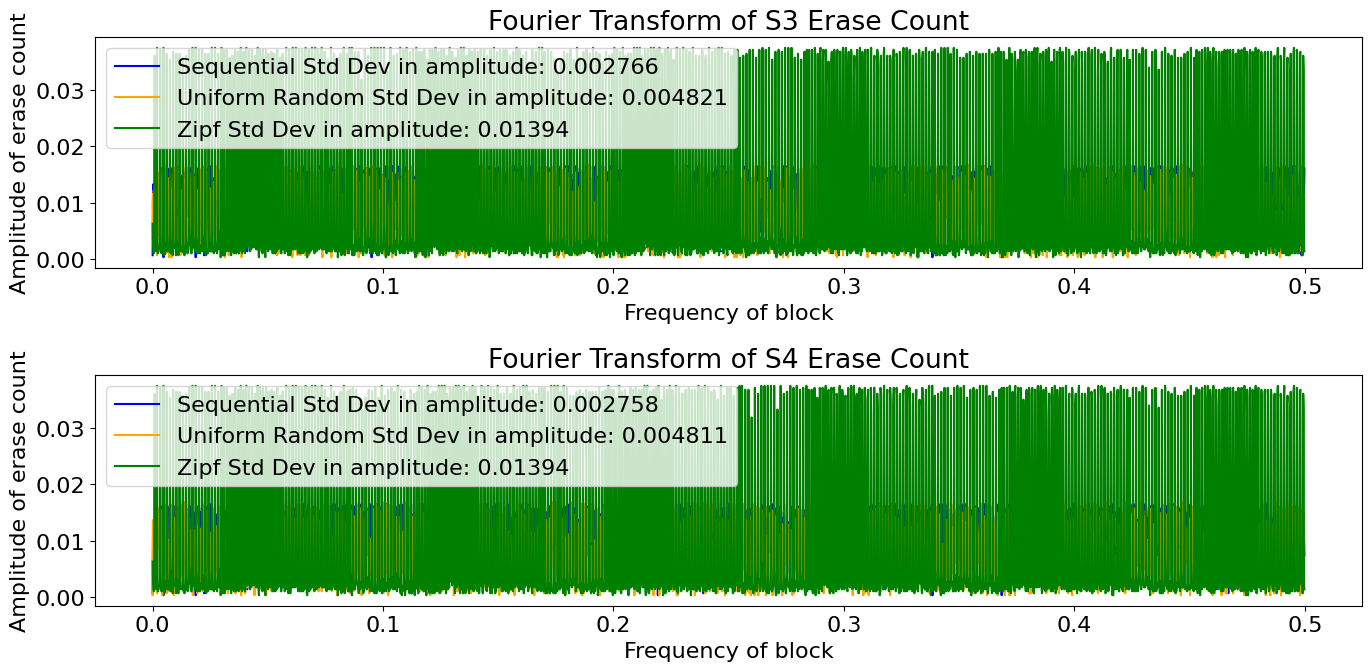

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


# Read JSON files into pandas dataframes
s5_seq_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/seq_s5_op_20/seq_trace.log.json')
s5_uniform_random_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/ran_s5_op_20/rand_trace.log.json')
s5_zipf_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/zipf_s5_op_20/zipf_trace.log.json')

# Extract the erase count data
s5_seq_invalid_page_count = s5_seq_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')
s5_uniform_random_invalid_page_count = s5_uniform_random_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')
s5_zipf_invalid_page_count = s5_zipf_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')

# remove all 0 values 
s5_seq_invalid_page_count = s5_seq_invalid_page_count[s5_seq_invalid_page_count['erase_count'] > 0]
s5_uniform_random_invalid_page_count = s5_uniform_random_invalid_page_count[s5_uniform_random_invalid_page_count['erase_count'] > 0]
s5_zipf_invalid_page_count = s5_zipf_invalid_page_count[s5_zipf_invalid_page_count['erase_count'] > 0]


# Read JSON files into pandas dataframes
s4_seq_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/seq_s4_op_20/seq_trace.log.json')
s4_uniform_random_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/ran_s4_op_20/rand_trace.log.json')
s4_zipf_trace_df = pd.read_json('/home/habib/Downloads/equation_train_data/zipf_s4_op_20/zipf_trace.log.json')

# Extract the erase count data
s4_seq_invalid_page_count = s4_seq_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')
s4_uniform_random_invalid_page_count = s4_uniform_random_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')
s4_zipf_invalid_page_count = s4_zipf_trace_df.iloc[4].reset_index(drop=True).to_frame(name='erase_count')

# remove all 0 values 
s4_seq_invalid_page_count = s4_seq_invalid_page_count[s4_seq_invalid_page_count['erase_count'] > 0]
s4_uniform_random_invalid_page_count = s4_uniform_random_invalid_page_count[s4_uniform_random_invalid_page_count['erase_count'] > 0]
s4_zipf_invalid_page_count = s4_zipf_invalid_page_count[s4_zipf_invalid_page_count['erase_count'] > 0]


# Number of samples
N = len(s4_uniform_random_invalid_page_count)
# Sample spacing (assuming uniform spacing)
T = 1.0

# Compute the FFT for seq, random , zipf both S5 and S4
seq_yf_s5 = fft(s5_seq_invalid_page_count)
seq_yf_s4 = fft(s4_seq_invalid_page_count)
uniform_random_yf_s5 = fft(s5_uniform_random_invalid_page_count)
uniform_random_yf_s4 = fft(s4_uniform_random_invalid_page_count)
zipf_yf_s5 = fft(s5_zipf_invalid_page_count)
zipf_yf_s4 = fft(s4_zipf_invalid_page_count)
xf = fftfreq(N, T)[:N//2]

# find the average amplitude of the fft for S5 and S4 for all traces
average_amplitude_seq_s5 = np.mean(np.abs(seq_yf_s5[:N//2]))
average_amplitude_seq_s4 = np.mean(np.abs(seq_yf_s4[:N//2]))
average_amplitude_uniform_random_s5 = np.mean(np.abs(uniform_random_yf_s5[:N//2]))
average_amplitude_uniform_random_s4 = np.mean(np.abs(uniform_random_yf_s4[:N//2]))
average_amplitude_zipf_s5 = np.mean(np.abs(zipf_yf_s5[:N//2]))
average_amplitude_zipf_s4 = np.mean(np.abs(zipf_yf_s4[:N//2]))


# find the maximum amplitude of the fft for S5 and S4 for all traces
max_amplitude_seq_s5 = np.max(np.abs(seq_yf_s5[:N//2]))
max_amplitude_seq_s4 = np.max(np.abs(seq_yf_s4[:N//2]))
max_amplitude_uniform_random_s5 = np.max(np.abs(uniform_random_yf_s5[:N//2]))
max_amplitude_uniform_random_s4 = np.max(np.abs(uniform_random_yf_s4[:N//2]))
max_amplitude_zipf_s5 = np.max(np.abs(zipf_yf_s5[:N//2]))
max_amplitude_zipf_s4 = np.max(np.abs(zipf_yf_s4[:N//2]))

print(f'Maximum Amplitude of S5 Sequential: {max_amplitude_seq_s5}')
print(f'Maximum Amplitude of S4 Sequential: {max_amplitude_seq_s4}')
print(f'Maximum Amplitude of S5 Uniform Random: {max_amplitude_uniform_random_s5}')
print(f'Maximum Amplitude of S4 Uniform Random: {max_amplitude_uniform_random_s4}')
print(f'Maximum Amplitude of S5 Zipf: {max_amplitude_zipf_s5}')
print(f'Maximum Amplitude of S4 Zipf: {max_amplitude_zipf_s4}')


print(f'Average Amplitude of S5 Sequential: {average_amplitude_seq_s5}')
print(f'Average Amplitude of S4 Sequential: {average_amplitude_seq_s4}')
print(f'Average Amplitude of S5 Uniform Random: {average_amplitude_uniform_random_s5}')
print(f'Average Amplitude of S4 Uniform Random: {average_amplitude_uniform_random_s4}')
print(f'Average Amplitude of S5 Zipf: {average_amplitude_zipf_s5}')
print(f'Average Amplitude of S4 Zipf: {average_amplitude_zipf_s4}')

# Find the deviation of fft for S5 and S4 for all traces two decimal places
deviation_seq_s5 = np.std(2.0/N * np.abs(seq_yf_s5[:N//2])).round(6)
deviation_seq_s4 = np.std(2.0/N * np.abs(seq_yf_s4[:N//2])).round(6)
deviation_uniform_random_s5 = np.std(2.0/N * np.abs(uniform_random_yf_s5[:N//2])).round(6)
deviation_uniform_random_s4 = np.std(2.0/N * np.abs(uniform_random_yf_s4[:N//2])).round(6)
deviation_zipf_s5 = np.std(np.abs(2.0/N * zipf_yf_s5[:N//2])).round(6)
deviation_zipf_s4 = np.std(np.abs(2.0/N * zipf_yf_s4[:N//2])).round(6)

print(f'Deviation of S5 Sequential: {deviation_seq_s5}')
print(f'Deviation of S4 Sequential: {deviation_seq_s4}')
print(f'Deviation of S5 Uniform Random: {deviation_uniform_random_s5}')
print(f'Deviation of S4 Uniform Random: {deviation_uniform_random_s4}')
print(f'Deviation of S5 Zipf: {deviation_zipf_s5}')
print(f'Deviation of S4 Zipf: {deviation_zipf_s4}')


# Plot the FFT results
# increase the text size
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14, 7))

# S5 FFT plot
plt.subplot(2, 1, 1)
plt.plot(xf, 2.0/N * np.abs(seq_yf_s5[:N//2]), label='Sequential Std Dev in amplitude: '+ str(deviation_seq_s5), color='blue')
plt.plot(xf, 2.0/N * np.abs(uniform_random_yf_s5[:N//2]), label='Uniform Random Std Dev in amplitude: '+ str(deviation_uniform_random_s5), color='orange')
plt.plot(xf, 2.0/N * np.abs(zipf_yf_s5[:N//2]), label='Zipf Std Dev in amplitude: '+ str(deviation_zipf_s5), color='green')

plt.title('Fourier Transform of S5 Erase Count')
plt.xlabel('Frequency of block')
plt.ylabel('Amplitude of erase count')
plt.legend()

# S4 FFT plot
plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(seq_yf_s4[:N//2]), label='Sequential Std Dev in amplitude: '+ str(deviation_seq_s4), color='blue')
plt.plot(xf, 2.0/N * np.abs(uniform_random_yf_s4[:N//2]), label='Uniform Random Std Dev in amplitude: '+ str(deviation_uniform_random_s4), color='orange')
plt.plot(xf, 2.0/N * np.abs(zipf_yf_s4[:N//2]), label='Zipf Std Dev in amplitude: '+ str(deviation_zipf_s4), color='green')

plt.title('Fourier Transform of S4 Erase Count')
plt.xlabel('Frequency of block')
plt.ylabel('Amplitude of erase count')
plt.legend()

plt.tight_layout()
plt.show()
